In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, train_test_split
# OLS, Ridge
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [439]:
# Read Attributes/Features from file
df_ip = pd.read_csv("/content/drive/My Drive/Regression Crops/swir_ds.csv")
print(df_ip.iloc[:,1:])

     Img_name Var_name  Band_001  ...  Band_254  Band_255  Band_256
0       38367     mean  33494.16  ...    907.07    882.74    866.28
1       38368     mean  30631.00  ...    662.62    654.40    633.60
2       38369     mean  30501.70  ...    812.08    797.25    793.31
3       38370     mean  31935.69  ...    894.70    877.91    849.85
4       38371     mean  31334.30  ...    839.69    830.51    789.81
..        ...      ...       ...  ...       ...       ...       ...
450     38847     mean  36645.46  ...    956.51    920.53    893.65
451     38848     mean  33674.15  ...    839.43    806.54    783.64
452     38849     mean  32276.04  ...    966.73    929.47    906.54
453     38850     mean  32733.53  ...    846.66    814.37    791.89
454     38851     mean  29857.77  ...    734.84    728.57    713.01

[455 rows x 258 columns]


In [440]:
# Read Targets Class from file
df_out = pd.read_csv("/content/drive/My Drive/Regression Crops/tgt_sugar.csv", float_precision='round_trip')
print(df_out)

     Barcode         Print Info  ...  1,1,1-Kestopentaose Total Fructan
0      38368    Cabaret-R1_L1P3  ...               0.0690        7.2098
1      38369     Hassan-R1_L1P4  ...               0.2214        8.3110
2      38370     Goldie-R1_L1P5  ...               1.1188       14.6028
3      38371    Foxtrot-R1_L1P6  ...               0.1631        3.2343
4      38372    check 3-R1_L1P7  ...               0.1852        6.9215
..       ...                ...  ...                  ...           ...
471    38864  Foxtrot-R3_L21P19  ...               0.2155       13.3492
472    38865     Drum-R3_L21P20  ...               0.2383        5.6861
473    38868  Chariot-R3_L21P23  ...               0.4065       21.3713
474    38870     Alis-R3_L21P25  ...               0.0514        5.0629
475    38859  check 3-R9_L21P14  ...               0.0679        5.7750

[476 rows x 17 columns]


In [441]:
# Joining Attributes & Targets
result = pd.merge(df_ip,
                  df_out[['Barcode','Print Info','Variety ID','Glucose','Fructose','Sucrose','Raffinose','1-Kestose','Maltose','Nystose','1,1,1-Kestopentaose','Total Fructan']],
                  left_on='Img_name',
                  right_on='Barcode',
                  how='inner')
print(result.head())

   Index  Img_name Var_name  ...  Nystose  1,1,1-Kestopentaose  Total Fructan
0      1     38367     mean  ...   0.4549               0.4934         7.4516
1      3     38368     mean  ...   0.8382               0.0690         7.2098
2      5     38369     mean  ...   1.3786               0.2214         8.3110
3      7     38370     mean  ...   2.2351               1.1188        14.6028
4      9     38371     mean  ...   0.2620               0.1631         3.2343

[5 rows x 271 columns]


In [0]:
y_all = result[['Img_name', 'Var_name', 'Barcode', 'Glucose','Fructose','Sucrose','Raffinose','1-Kestose','Maltose','Nystose','1,1,1-Kestopentaose',
                'Total Fructan','Band_001', 'Band_002', 'Band_003', 'Band_004', 'Band_005', 'Band_006', 'Band_007','Band_008', 'Band_009',
     'Band_010', 'Band_011', 'Band_012', 'Band_013', 'Band_014', 'Band_015', 'Band_016', 'Band_017', 'Band_018', 'Band_019', 'Band_020',
     'Band_021', 'Band_022', 'Band_023', 'Band_024', 'Band_025', 'Band_026', 'Band_027', 'Band_028', 'Band_029','Band_030', 'Band_031',
     'Band_032', 'Band_033', 'Band_034', 'Band_035', 'Band_036', 'Band_037', 'Band_038', 'Band_039', 'Band_040','Band_041', 'Band_042',
     'Band_043', 'Band_044', 'Band_045', 'Band_046', 'Band_047', 'Band_048', 'Band_049', 'Band_050', 'Band_051','Band_052', 'Band_053',
     'Band_054', 'Band_055', 'Band_056', 'Band_057', 'Band_058', 'Band_059', 'Band_060', 'Band_061', 'Band_062','Band_063', 'Band_064',
     'Band_065', 'Band_066', 'Band_067', 'Band_068', 'Band_069', 'Band_070', 'Band_071', 'Band_072', 'Band_073','Band_074', 'Band_075',
     'Band_076', 'Band_077', 'Band_078', 'Band_079', 'Band_080', 'Band_081', 'Band_082', 'Band_083', 'Band_084','Band_085', 'Band_086',
     'Band_087', 'Band_088', 'Band_089', 'Band_090', 'Band_091', 'Band_092', 'Band_093', 'Band_094', 'Band_095','Band_096', 'Band_097',
     'Band_098', 'Band_099', 'Band_100', 'Band_101', 'Band_102', 'Band_103', 'Band_104', 'Band_105', 'Band_106','Band_107', 'Band_108',
     'Band_109', 'Band_110', 'Band_111', 'Band_112', 'Band_113', 'Band_114', 'Band_115', 'Band_116', 'Band_117','Band_118', 'Band_119',
     'Band_120', 'Band_121', 'Band_122', 'Band_123', 'Band_124', 'Band_125', 'Band_126', 'Band_127', 'Band_128','Band_129', 'Band_130',
     'Band_131', 'Band_132', 'Band_133', 'Band_134', 'Band_135', 'Band_136', 'Band_137', 'Band_138', 'Band_139','Band_140', 'Band_141',
     'Band_142', 'Band_143', 'Band_144', 'Band_145', 'Band_146', 'Band_147', 'Band_148', 'Band_149', 'Band_150','Band_151', 'Band_152',
     'Band_153', 'Band_154', 'Band_155', 'Band_156', 'Band_157', 'Band_158', 'Band_159', 'Band_160', 'Band_161','Band_162', 'Band_163',
     'Band_164', 'Band_165', 'Band_166', 'Band_167', 'Band_168', 'Band_169', 'Band_170', 'Band_171', 'Band_172','Band_173', 'Band_174',
     'Band_175', 'Band_176', 'Band_177', 'Band_178', 'Band_179', 'Band_180', 'Band_181', 'Band_182', 'Band_183','Band_184', 'Band_185',
     'Band_186', 'Band_187', 'Band_188', 'Band_189', 'Band_190', 'Band_191', 'Band_192', 'Band_193', 'Band_194','Band_195', 'Band_196',
     'Band_197', 'Band_198', 'Band_199', 'Band_200', 'Band_201', 'Band_202', 'Band_203', 'Band_204', 'Band_205','Band_206', 'Band_207',
     'Band_208', 'Band_209', 'Band_210', 'Band_211', 'Band_212', 'Band_213', 'Band_214', 'Band_215', 'Band_216','Band_217', 'Band_218',
     'Band_219', 'Band_220', 'Band_221', 'Band_222', 'Band_223', 'Band_224', 'Band_225', 'Band_226', 'Band_227','Band_228', 'Band_229',
     'Band_230', 'Band_231', 'Band_232', 'Band_233', 'Band_234', 'Band_235', 'Band_236', 'Band_237', 'Band_238','Band_239', 'Band_240',
     'Band_241', 'Band_242', 'Band_243', 'Band_244', 'Band_245', 'Band_246', 'Band_247', 'Band_248', 'Band_249','Band_250', 'Band_251',
     'Band_252', 'Band_253', 'Band_254', 'Band_255', 'Band_256']]

In [443]:
# Select Target Sugar (from position 3, 11)
y = y_all.iloc[:, 6].values
print(y)

[ 7.1915  6.9578  5.2362  7.7565  4.6418  5.373   7.196   4.5749  5.46
  5.2965  6.8276  6.227   7.7781  6.1418  5.7444  5.8451  7.2133  6.1022
  5.4552  4.8594  7.317   5.7955  4.6767  5.876   5.4178  6.9996  5.0145
  7.8817  7.2032  5.8125  4.1007  4.9703  6.4496  5.0353  7.2356  5.0887
  7.9523  5.5011  5.3098  6.1578  7.1552  7.1504  7.9801  5.9497  7.9265
  5.4121  5.7106  5.9555  5.7908  7.9068  5.0967  3.5349  5.3991  7.8363
  5.8534  6.3998  7.4884  7.5106  7.8879  5.2679  4.0842  6.3807  6.4224
  6.9299  6.4802  8.2989  7.8593  7.7024  6.9811  7.4835  6.3916  5.4079
  4.6689  5.2813  5.8851  8.465   6.2669  8.1878  6.4726  7.4477  7.2288
  6.4925  5.8322  5.8027  7.6319  6.6093  5.2157  6.1775  7.6713  6.5021
  7.2868  7.4158  6.1266  5.4567  7.5639  5.9222  4.0555  5.1279  7.6546
  5.4836  6.0064  5.8105  5.2995  5.3063  6.0986  6.5969  5.1754  5.3196
  4.4476  3.7418  5.0104  4.7581  5.3301  5.776   7.1396  4.8861  8.6256
  7.2737  6.6827  4.53    3.0861  3.2936  5.7288  7.3

In [444]:
# Select the input features
X = y_all.iloc[:, 12:].values
print(X)

[[33494.16 33716.49 33859.19 ...   907.07   882.74   866.28]
 [30631.   30815.5  30934.05 ...   662.62   654.4    633.6 ]
 [30501.7  30677.4  30827.57 ...   812.08   797.25   793.31]
 ...
 [32276.04 32447.13 32561.55 ...   966.73   929.47   906.54]
 [32733.53 32896.95 33042.04 ...   846.66   814.37   791.89]
 [29857.77 30059.48 30206.71 ...   734.84   728.57   713.01]]


In [0]:
# standardize and train/test split
X = preprocessing.scale( y_all.iloc[:, 12:])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [0]:
ols_reg = LinearRegression()
ols_reg.fit(X_train, y_train)
ols_pred = ols_reg.predict(X_test)

In [447]:
# Capturing the column names
col_vals=[]
for i in y_all.columns[12:]:
     col_vals.append(i)

print(col_vals)

['Band_001', 'Band_002', 'Band_003', 'Band_004', 'Band_005', 'Band_006', 'Band_007', 'Band_008', 'Band_009', 'Band_010', 'Band_011', 'Band_012', 'Band_013', 'Band_014', 'Band_015', 'Band_016', 'Band_017', 'Band_018', 'Band_019', 'Band_020', 'Band_021', 'Band_022', 'Band_023', 'Band_024', 'Band_025', 'Band_026', 'Band_027', 'Band_028', 'Band_029', 'Band_030', 'Band_031', 'Band_032', 'Band_033', 'Band_034', 'Band_035', 'Band_036', 'Band_037', 'Band_038', 'Band_039', 'Band_040', 'Band_041', 'Band_042', 'Band_043', 'Band_044', 'Band_045', 'Band_046', 'Band_047', 'Band_048', 'Band_049', 'Band_050', 'Band_051', 'Band_052', 'Band_053', 'Band_054', 'Band_055', 'Band_056', 'Band_057', 'Band_058', 'Band_059', 'Band_060', 'Band_061', 'Band_062', 'Band_063', 'Band_064', 'Band_065', 'Band_066', 'Band_067', 'Band_068', 'Band_069', 'Band_070', 'Band_071', 'Band_072', 'Band_073', 'Band_074', 'Band_075', 'Band_076', 'Band_077', 'Band_078', 'Band_079', 'Band_080', 'Band_081', 'Band_082', 'Band_083', 'Ba

In [0]:
# initialize
ridge_reg = Ridge(alpha=0)
ridge_reg.fit(X_train, y_train)
ridge_df = pd.DataFrame({'variable': col_vals, 'estimate': ridge_reg.coef_})
ridge_train_pred = []
ridge_test_pred = []

In [0]:
# iterate lambdas from 0 to 25 (increase model complexity)
for alpha in np.arange(0, 25, 1):
    # training
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    ridge_df[var_name] = ridge_reg.coef_
    # prediction
    ridge_train_pred.append(ridge_reg.predict(X_train))
    ridge_test_pred.append(ridge_reg.predict(X_test))

In [0]:
# organize dataframe
ridge_df = ridge_df.set_index('variable').T.rename_axis('estimate').reset_index()

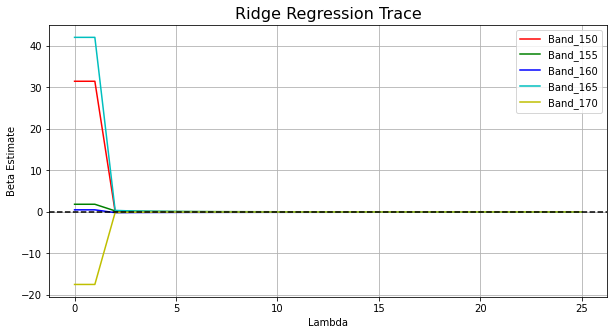

In [451]:
# plot betas by lambda
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ridge_df.Band_150, 'r', ridge_df.Band_155, 'g', ridge_df.Band_160, 'b', ridge_df.Band_165, 'c', ridge_df.Band_170, 'y')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=16)
ax.legend(labels=['Band_150', 'Band_155', 'Band_160', 'Band_165', 'Band_170'])
ax.grid(True)

plt.show()

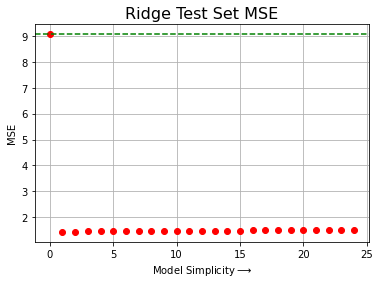

In [452]:
# MSE of Ridge and OLS
ridge_mse_test = [mean_squared_error(y_test, p) for p in ridge_test_pred]
ols_mse = mean_squared_error(y_test, ols_pred)

# plot mse
plt.plot(ridge_mse_test[:25], 'ro')
plt.axhline(y=ols_mse, color='g', linestyle='--')
plt.title("Ridge Test Set MSE", fontsize=16)
plt.xlabel("Model Simplicity$\longrightarrow$")
plt.ylabel("MSE")
plt.show()

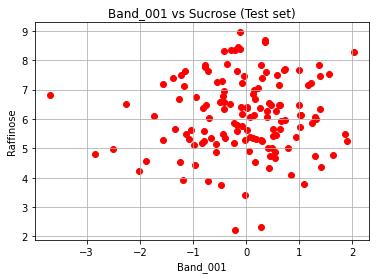

In [453]:
# How the Input is correlated to Target value in Training Set
y_predic = ridge_reg.predict(X_train)

plt.scatter(X_test[:, 0], y_test, color = 'red')
# plt.plot(X_train, y_predic, color = 'blue')
plt.title('Band_001 vs Sucrose (Test set)')
plt.xlabel('Band_001')
plt.ylabel('Raffinose')
plt.show()



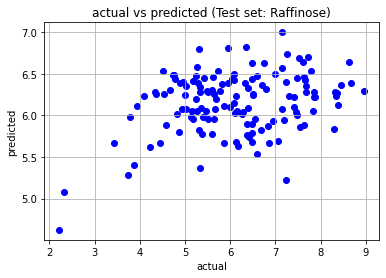

In [454]:
# Ridge Regression Actual vs Predicted on Test Data set
y_predicted = ridge_reg.predict(X_test)
plt.scatter(y_test, y_predicted, color = 'blue')
plt.title('actual vs predicted (Test set: Raffinose)')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

Text(0, 0.5, 'R-squared')

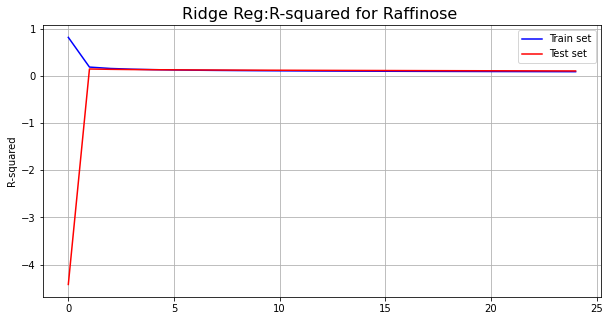

In [455]:
# R-squared of training set
ridge_r_squared_train = [r2_score(y_train, p) for p in ridge_train_pred]
# R-squared of test set
ridge_r_squared_test = [r2_score(y_test, p) for p in ridge_test_pred]
# ols for benchmark
ols_r_squared = r2_score(y_test, ols_pred)

# plot R-squared of training and test
fig, axes = plt.subplots(figsize=(10, 5))
plt.rcParams['axes.grid'] = True

# training set and test set together
axes.plot(ridge_r_squared_train, 'b', ridge_r_squared_test, 'r')
axes.set_title("Ridge Reg:R-squared for Raffinose ", fontsize=16)
axes.legend(labels=['Train set', 'Test set'])
axes.set_ylabel("R-squared")

In [456]:
print(ridge_reg.intercept_)
print(
    
)

6.177895592419269



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11401462944979812, tolerance: 0.06339225102830286
  positive)


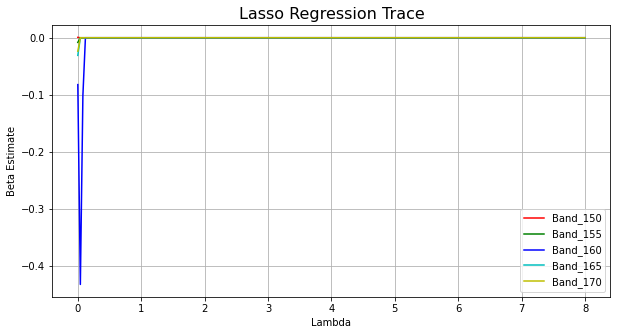

In [457]:
# initialize
lasso_reg = Lasso(alpha=1, max_iter = 1000, tol = 1e-20)
lasso_reg.fit(X_train, y_train)
lasso_df = pd.DataFrame({'variable': col_vals, 'estimate': ridge_reg.coef_})
lasso_train_pred = []
lasso_test_pred = []

alphas = np.arange(0.01, 8.01, 0.04)

for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    lasso_df[var_name] = lasso_reg.coef_
    # prediction
    lasso_train_pred.append(lasso_reg.predict(X_train))
    lasso_test_pred.append(lasso_reg.predict(X_test))

lasso_df = lasso_df.set_index('variable').T.rename_axis('estimate').reset_index()

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(lasso_df.Band_150, 'r', lasso_df.Band_155, 'g', lasso_df.Band_160, 'b', lasso_df.Band_165, 'c', lasso_df.Band_170, 'y')
ax.set_xlabel("Lambda")
ax.set_xticklabels(np.arange(-1, 10, 1))
ax.set_ylabel("Beta Estimate")
ax.set_title("Lasso Regression Trace", fontsize=16)
ax.legend(labels=['Band_150','Band_155','Band_160','Band_165','Band_170'])
ax.grid(True)

In [458]:
# # plot mse
# plt.plot(ridge_test_pred[0], y_test)
# # plt.axhline(y=ols_mse, color='g', linestyle='--')
# plt.title("Ridge Test Prediction", fontsize=16)
# plt.xlabel("y_test")
# plt.ylabel("y_predict")
# plt.show()

print(ridge_test_pred[0])
print(y_test)

[-0.31149094 11.76270864  8.18443963  9.51316719  1.08818294  6.97458261
  8.20746078  4.03888935  7.01337284  2.18424302  7.65428058  8.66305681
  8.77183446  6.04384157  5.89131676 11.0855245   8.91134037  0.39485328
 -0.36070516  5.48131513  6.72775441  4.38041958  7.49346045  5.43338262
  5.80043727  4.76580778  4.5341957   6.73024784  8.41491444 10.95876793
  6.1462187   2.31853758  6.38750608  5.90265609  6.6001263   8.775861
  8.38182194  8.4405298   1.95751229 -0.04931732  3.66464849  7.6753301
  4.91417283  8.53711212  9.42311284  5.53049535  5.13891179  4.5213492
  5.28179377  9.48492276  2.45117741  7.23468649  5.77845854  6.30386827
 13.99705711  9.74940633  7.85641967  2.68692732  1.59497166  8.8356592
  8.65468687  4.66531734 15.48744877  8.05992649  7.37214644 10.71791736
  5.22635017  3.38433614  4.71599516  4.97171907  9.25884229  7.01593483
  2.3891269   6.61530109  4.2693477   2.73124314  7.75622647  6.52968962
  5.03178824  5.65193101 13.2911767   4.44602643  8.7856

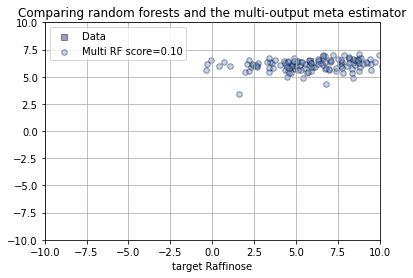

In [459]:
# Plot the results
plt.figure()
s = 30
a = 0.4

plt.scatter(y_test[0], y_test[1], edgecolor='k',
            c="navy", s=s, marker="s", alpha=a, label="Data")
plt.scatter(ridge_test_pred[0], ridge_test_pred[1], edgecolor='k',
            c="cornflowerblue", s=s, alpha=a,
            label="Multi RF score=%.2f" % ridge_reg.score(X_test, y_test))
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.xlabel("target Raffinose")
# plt.ylabel("target 2")
plt.title("Comparing random forests and the multi-output meta estimator")
plt.legend()
plt.show()